In [1]:
import sys, os
sys.path.append('../modules')
from nsw.nsw_classifier import NSWClassifier
from nsw.data_gen import gen_kd

# 1. Building a cut

In [2]:
C = NSWClassifier()
C.build_navigable_graph([([1, 2], 3), ([1.2, 2], 3), ((3, 4), 5), ((4, 4), 5), ((6, 4), 5)])
C.cut

Classifier graph is build in 0.003s


{(2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1)}

# 2. Classification works

In [3]:
c = C.classify_by_path([1.1, 2.2], attempts=17)
fc = C.classify_fuzzy_by_path([1.1, 2.2], attempts=11)

print(f"Class = {c}, Fuzzy Classes = {fc}")

Class = 5, Fuzzy Classes = {(3, 0.36363636363636365), (5, 0.6363636363636364)}


# 3. Different classification types

In [4]:
print(C.classify_knn([1.1, 2.2], attempts=11, k=1))
print(C.classify_knn([1.1, 2.2], attempts=11, k=3))
print(C.classify_fuzzy_knn([1.1, 2.2], attempts=11, k=5))

3
3
[1, 0, 2, 3, 4]
{(3, 0.4), (5, 0.6)}


# 4. Cut size estimation
We create a sphere which builds 2 equal (by volume) classes.
$${\displaystyle V_{n}(R)={\frac {\pi ^{n/2}}{\Gamma ({\frac {n}{2}}+1)}}R^{n}}$$

$${\displaystyle \frac{V}{2}={\frac {\pi ^{n/2}}{\Gamma ({\frac {n}{2}}+1)}}R^{n}}$$

$$R^{n}=\frac{V\Gamma ({\frac {n}{2}}+1)}{2\pi ^{n/2}}$$

$$R=\sqrt[n]{\frac{V\Gamma ({\frac {n}{2}}+1)}{2\pi ^{n/2}}}$$

In [189]:
from scipy.special import gamma as Г
import numpy as np


# sizes = [1000, 2000, 3000, 4000, 10000]
sizes =  [50000, 100000, 200000, 500000]
dims = [2, 3, 5, 10, 64]

def radius(n, V):
    r = (V ** (1 / n)) * (Г(n / 2 + 1) ** (1/n)) / (2. ** (1 / n)) / np.pi ** .5
    return r

f = open("../dumps/cut.txt", "a")
# cube = []

for size in sizes:
    for dim in dims:
#         r = radius(dim, 2 ** dim)
#         print(f"Sphere radius = {r}")
        data = gen_kd(N=size, k=dim, border= .79 * (dim / 2) ** .5)
        ones = sum(1 for item in data if item[1] == 1)
        zeros = sum(1 for item in data if item[1] == 0)
        print(f"0 ~ {ones}; 1 ~ {zeros}")
        C = NSWClassifier()
        C.build_navigable_graph(data, attempts=att)
        edges = sum(len(node.neighbourhood) for node in C.nodes) // 2
        ext_string = f"Size {size}, Dim {dim}, Ratio {zeros / size:.2f}, Edges {edges},Cut {len(C.cut)},Radius {r}"
        string = f"{size},{dim},{zeros},{edges},{len(C.cut)},{r}"
        tpl = (size, dim, zeros, edges ,len(C.cut), r)
        cube.append(tpl)
        print(ext_string)
        f.write(string + "\n")
        f.flush()

0 ~ 25403; 1 ~ 24597
Classifier graph is build in 371.334s
Size 50000, Dim 2, Ratio 0.49, Edges 299979,Cut 6794,Radius 1.6993004967046683
0 ~ 26442; 1 ~ 23558
Classifier graph is build in 363.835s
Size 50000, Dim 3, Ratio 0.47, Edges 449955,Cut 26900,Radius 1.6993004967046683
0 ~ 27154; 1 ~ 22846
Classifier graph is build in 495.787s
Size 50000, Dim 5, Ratio 0.46, Edges 749880,Cut 127190,Radius 1.6993004967046683
0 ~ 28862; 1 ~ 21138
Classifier graph is build in 1512.834s
Size 50000, Dim 10, Ratio 0.42, Edges 1499535,Cut 553048,Radius 1.6993004967046683
0 ~ 35683; 1 ~ 14317
Classifier graph is build in 30421.840s
Size 50000, Dim 64, Ratio 0.29, Edges 9581472,Cut 5093017,Radius 1.6993004967046683
0 ~ 51189; 1 ~ 48811
Classifier graph is build in 898.214s
Size 100000, Dim 2, Ratio 0.49, Edges 599979,Cut 7447,Radius 1.6993004967046683
0 ~ 52701; 1 ~ 47299
Classifier graph is build in 876.826s
Size 100000, Dim 3, Ratio 0.47, Edges 899955,Cut 44346,Radius 1.6993004967046683
0 ~ 54414; 1 ~ 4

KeyboardInterrupt: 

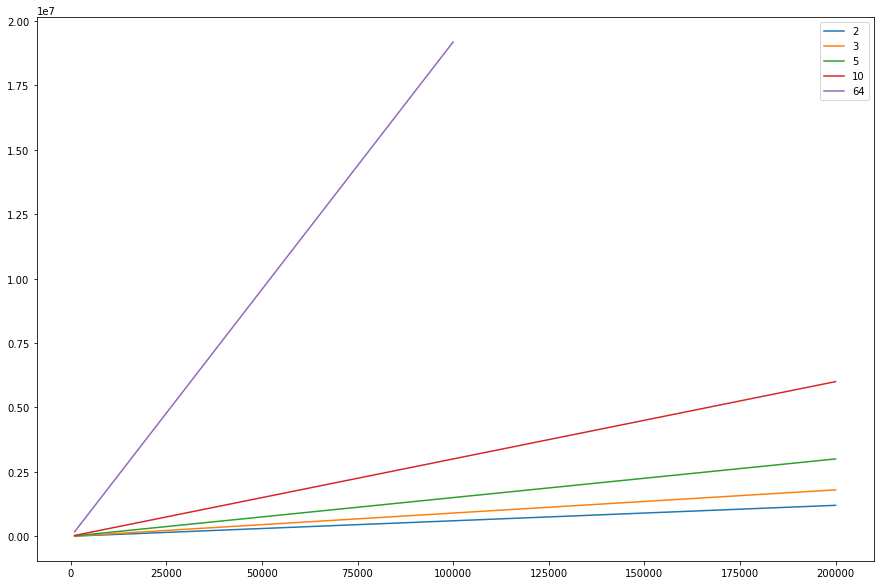

In [190]:
plt.figure(figsize=(15, 10))
X = np.array(sorted(cube))
for d in sorted(dims):
    xx = X[X[:, 1] == d]
    v = xx[:,0].flatten()
    e = xx[:,2].flatten()
    c = xx[:,3].flatten()
    ev = e / v
    plt.plot(v, c, label=f"{d}")
plt.legend()
plt.show()

In [193]:
import pickle
with open("../dumps/cube.pickle", 'wb') as f:
    pickle.dump(cube, f)